In [2]:
%pip install pandas-datareader
%pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas_datareader as pdr
import pandas as pd
import numpy
import datetime as dt
import yfinance as yf
from IPython.display import display

In [4]:
start = dt.datetime(2015,1,1)
end = dt.datetime(2025,12,31)
start,end

(datetime.datetime(2015, 1, 1, 0, 0), datetime.datetime(2025, 12, 31, 0, 0))

In [5]:
df = yf.download("MRF.NS", start=start, end=end, progress=False, auto_adjust=False)
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MRF.NS,MRF.NS,MRF.NS,MRF.NS,MRF.NS,MRF.NS
Date,,,,,,
2015-01-01,37343.800781,37981.351562,38320.000000,37848.351562,37950.0,9595
2015-01-02,37551.152344,38192.250000,38400.000000,37981.000000,38150.0,11099
2015-01-05,37831.406250,38477.300781,39390.000000,38000.000000,38299.0,38178
2015-01-06,36831.175781,37460.000000,38350.000000,37350.000000,38350.0,15734
2015-01-07,36753.570312,37381.050781,37724.949219,37011.000000,37499.0,10795
...,...,...,...,...,...,...
2025-11-04,157915.000000,157915.000000,159495.000000,157550.000000,159150.0,3650
2025-11-05,157915.000000,157915.000000,157915.000000,157915.000000,157915.0,0


In [6]:
df.columns

MultiIndex([('Adj Close', 'MRF.NS'),
            (    'Close', 'MRF.NS'),
            (     'High', 'MRF.NS'),
            (      'Low', 'MRF.NS'),
            (     'Open', 'MRF.NS'),
            (   'Volume', 'MRF.NS')],
           names=['Price', 'Ticker'])

In [7]:
close = df.Close
close

Ticker,MRF.NS
Date,
2015-01-01,37981.351562
2015-01-02,38192.250000
2015-01-05,38477.300781
2015-01-06,37460.000000
2015-01-07,37381.050781
...,...
2025-11-04,157915.000000
2025-11-05,157915.000000
2025-11-06,157255.000000


<Axes: xlabel='Date'>

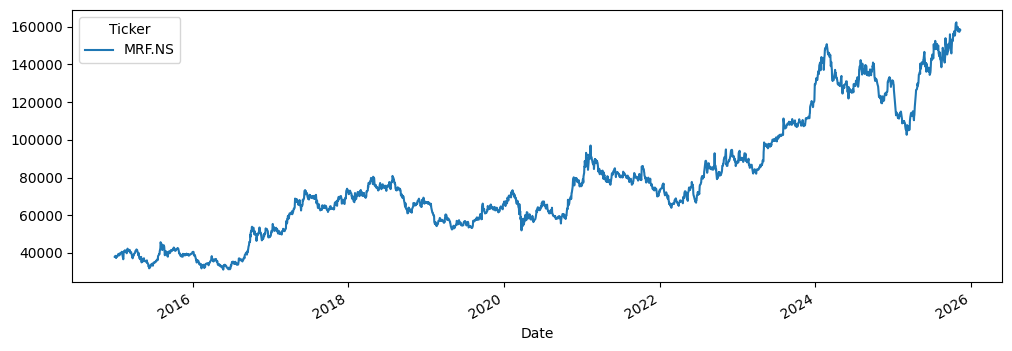

In [8]:
close.plot(figsize=(12,4))

In [9]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = "plotly"

In [10]:
close.plot()

In [11]:
high = df.High
high

Ticker,MRF.NS
Date,
2015-01-01,38320.000000
2015-01-02,38400.000000
2015-01-05,39390.000000
2015-01-06,38350.000000
2015-01-07,37724.949219
...,...
2025-11-04,159495.000000
2025-11-05,157915.000000
2025-11-06,159440.000000


In [12]:
high.plot()

In [13]:
# Remove the 'Ticker' level from MultiIndex columns
df.columns = df.columns.droplevel('Ticker')
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [14]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2015-01-01,37343.800781,37981.351562,38320.000000,37848.351562,37950.0,9595
2015-01-02,37551.152344,38192.250000,38400.000000,37981.000000,38150.0,11099
2015-01-05,37831.406250,38477.300781,39390.000000,38000.000000,38299.0,38178
2015-01-06,36831.175781,37460.000000,38350.000000,37350.000000,38350.0,15734
2015-01-07,36753.570312,37381.050781,37724.949219,37011.000000,37499.0,10795
...,...,...,...,...,...,...
2025-11-04,157915.000000,157915.000000,159495.000000,157550.000000,159150.0,3650
2025-11-05,157915.000000,157915.000000,157915.000000,157915.000000,157915.0,0
2025-11-06,157255.000000,157255.000000,159440.000000,156805.000000,158955.0,3826


In [15]:
df.drop(columns=["Volume",'Adj Close', 'High', 'Low', 'Volume'], inplace=True)

In [16]:
df

Price,Close,Open
Date,,
2015-01-01,37981.351562,37950.0
2015-01-02,38192.250000,38150.0
2015-01-05,38477.300781,38299.0
2015-01-06,37460.000000,38350.0
2015-01-07,37381.050781,37499.0
...,...,...
2025-11-04,157915.000000,159150.0
2025-11-05,157915.000000,157915.0
2025-11-06,157255.000000,158955.0


In [17]:
df.plot()

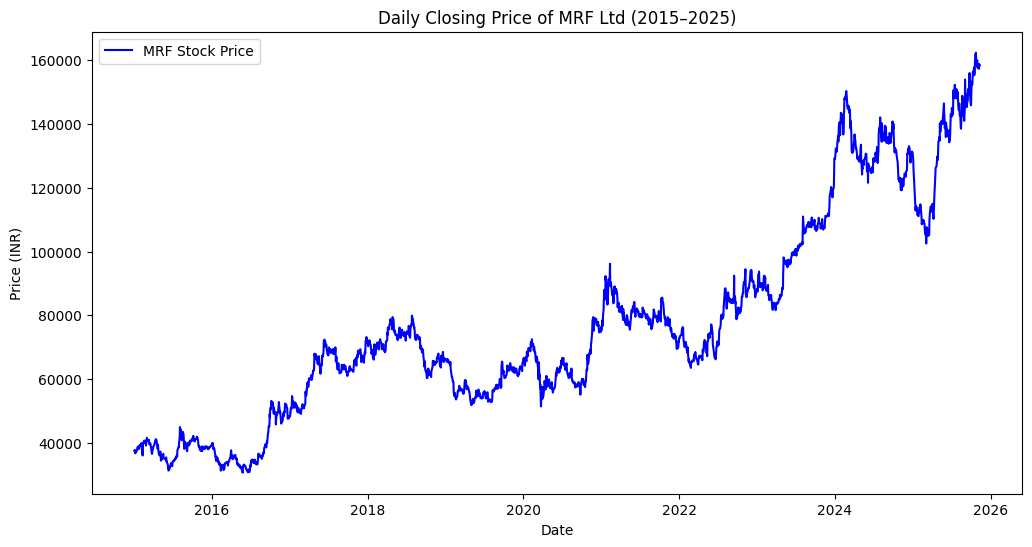

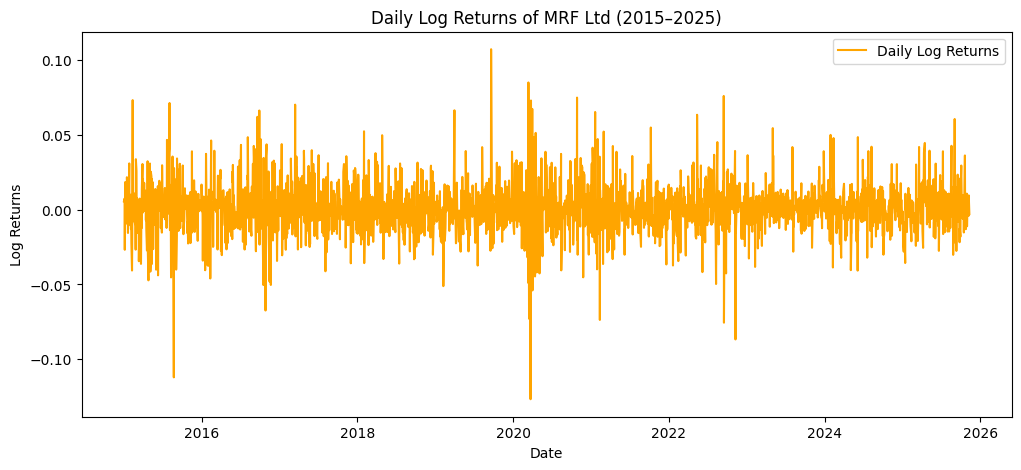

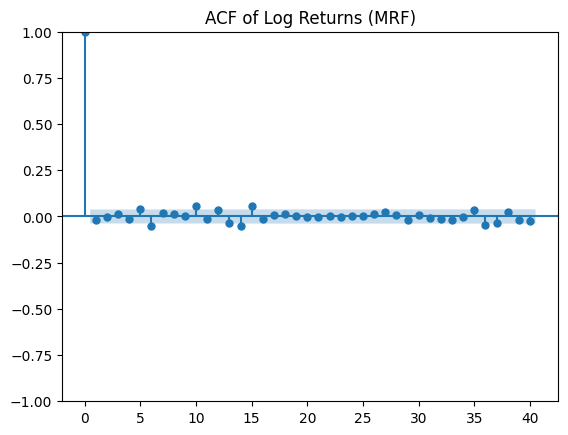

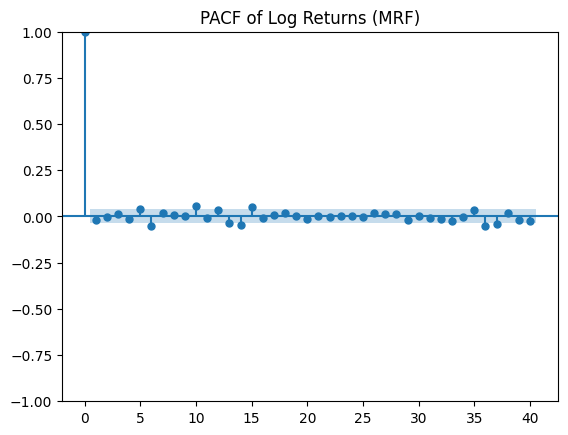


=== MRF Stationarity Test Results ===


C:\Users\rauna\AppData\Local\Temp\ipykernel_65648\403489681.py:50: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\rauna\AppData\Local\Temp\ipykernel_65648\403489681.py:51: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




,Series,ADF Statistic,ADF p-value,KPSS Statistic,KPSS p-value
0,Price,-0.106500,9.487873e-01,7.044955,0.01
1,Log Returns,-12.800672,6.764989e-24,0.048796,0.10


In [18]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, pacf, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Download MRF Data (2015–2025)
data =yf.download("MRF.NS", start=start, end=end, progress=False, auto_adjust=False)


# 2. Keep only Adjusted Close & compute Log Returns
data = data[['Adj Close']].rename(columns={'Adj Close': 'Price'})
data['Log_Returns'] = np.log(data['Price'] / data['Price'].shift(1))
data = data.dropna()

# 3. Summary Statistics
summary_stats = data['Log_Returns'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])
summary_stats['Skewness'] = data['Log_Returns'].skew()
summary_stats['Kurtosis'] = data['Log_Returns'].kurt()

# 4. Plot: Price and Log Returns
plt.figure(figsize=(12, 6))
plt.plot(data['Price'], label='MRF Stock Price', color='blue')
plt.title('Daily Closing Price of MRF Ltd (2015–2025)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(data['Log_Returns'], label='Daily Log Returns', color='orange')
plt.title('Daily Log Returns of MRF Ltd (2015–2025)')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

# 5. ACF and PACF for Returns
plot_acf(data['Log_Returns'], lags=40, title='ACF of Log Returns (MRF)')
plt.show()

plot_pacf(data['Log_Returns'], lags=40, title='PACF of Log Returns (MRF)')
plt.show()

# 6. Stationarity Tests: ADF and KPSS
adf_result = adfuller(data['Price'])
adf_returns = adfuller(data['Log_Returns'])

kpss_result = kpss(data['Price'], regression='c', nlags="auto")
kpss_returns = kpss(data['Log_Returns'], regression='c', nlags="auto")

# Combine results in a summary table
stationarity_results = pd.DataFrame({
    'Series': ['Price', 'Log Returns'],
    'ADF Statistic': [adf_result[0], adf_returns[0]],
    'ADF p-value': [adf_result[1], adf_returns[1]],
    'KPSS Statistic': [kpss_result[0], kpss_returns[0]],
    'KPSS p-value': [kpss_result[1], kpss_returns[1]]
})

print("\n=== MRF Stationarity Test Results ===")
display(stationarity_results)



📊 Summary Statistics for Log Returns

count    2680.000000
mean        0.000539
std         0.016383
min        -0.126679
25%        -0.007935
50%        -0.000067
75%         0.008203
max         0.107244
Name: Log_Returns, dtype: float64

Skewness: 0.1517
Kurtosis: 5.3601


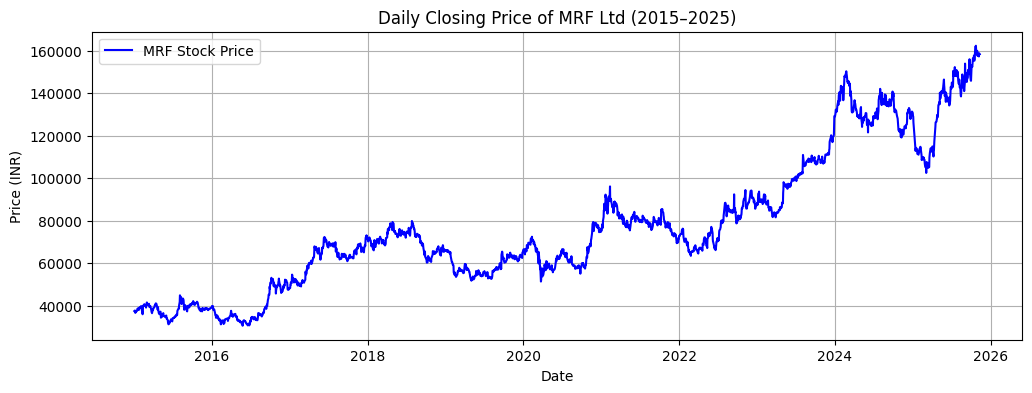

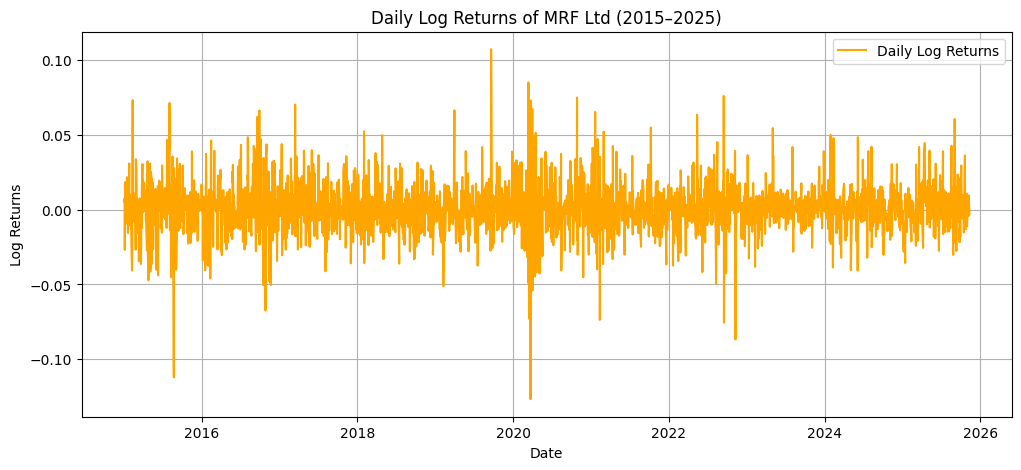

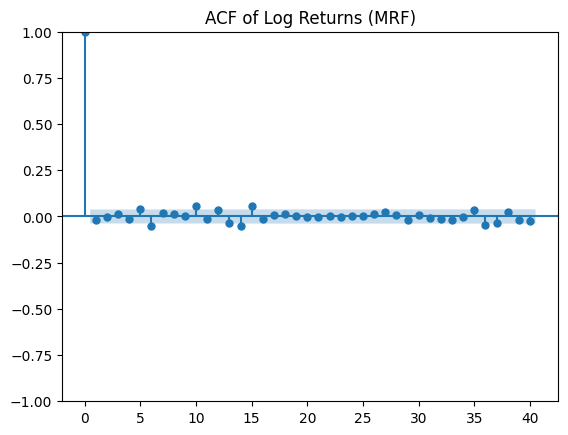

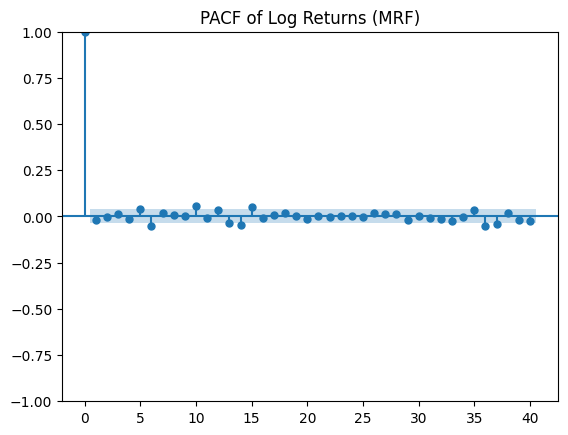


🧾 ADF Test Results for MRF Stock

        Series  ADF Statistic       p-value  Critical Value (5%)
0        Price      -0.106500  9.487873e-01            -2.862626
1  Log Returns     -12.800672  6.764989e-24            -2.862625


In [19]:

# Keep Adjusted Close & compute log-returns
data = yf.download("MRF.NS", start=start, end=end, progress=False, auto_adjust=False)


# 2. Use Adjusted Close for time series modeling
data = data[['Adj Close']].rename(columns={'Adj Close': 'Price'})

# 3. Compute Log Returns
data['Log_Returns'] = np.log(data['Price'] / data['Price'].shift(1))
data.dropna(inplace=True)

# 4. Summary Statistics
print("\n📊 Summary Statistics for Log Returns\n")
print(data['Log_Returns'].describe())
print("\nSkewness:", round(data['Log_Returns'].skew(), 4))
print("Kurtosis:", round(data['Log_Returns'].kurt(), 4))

# 5. Plot: Price and Log Returns
plt.figure(figsize=(12, 4))
plt.plot(data['Price'], label='MRF Stock Price', color='blue')
plt.title('Daily Closing Price of MRF Ltd (2015–2025)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(data['Log_Returns'], label='Daily Log Returns', color='orange')
plt.title('Daily Log Returns of MRF Ltd (2015–2025)')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True)
plt.show()

# 6. ACF and PACF for Returns
plot_acf(data['Log_Returns'], lags=40, title='ACF of Log Returns (MRF)')
plt.show()

plot_pacf(data['Log_Returns'], lags=40, title='PACF of Log Returns (MRF)')
plt.show()

# 7. Stationarity Test: Augmented Dickey-Fuller (ADF)
adf_price = adfuller(data['Price'])
adf_returns = adfuller(data['Log_Returns'])

# 8. Create results summary
results = pd.DataFrame({
    'Series': ['Price', 'Log Returns'],
    'ADF Statistic': [adf_price[0], adf_returns[0]],
    'p-value': [adf_price[1], adf_returns[1]],
    'Critical Value (5%)': [adf_price[4]['5%'], adf_returns[4]['5%']]
})

print("\n🧾 ADF Test Results for MRF Stock\n")
print(results)

In [21]:
# -----------------------------------------
# STEP 2: ARIMA MODELING AND FORECASTING (FIXED)
# -----------------------------------------

import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# 1) Download and prepare returns (robust)
raw = yf.download("MRF.NS", start=start, end=end, progress=False, auto_adjust=False)
if isinstance(raw.columns, pd.MultiIndex):
    raw.columns = raw.columns.droplevel('Ticker')

price = raw['Adj Close'].astype('float64')
returns = np.log(price / price.shift(1))
series = pd.Series(returns, name="Log_Returns").replace([np.inf, -np.inf], np.nan).dropna()

series.index = pd.DatetimeIndex(series.index)
inferred = pd.infer_freq(series.index)
if inferred:
    series = series.asfreq(inferred)

print(f"Returns len: {len(series)}, NaNs: {series.isna().sum()}, finite: {np.isfinite(series).all()}")

# 2) Train-test split
train_size = int(len(series) * 0.9)
train = series.iloc[:train_size]
test = series.iloc[train_size:]
print(f"Train: {len(train)}, Test: {len(test)}")

# 3) Fit SARIMAX (ARIMA equivalent) with relaxed constraints
model = SARIMAX(train, order=(1,0,1), trend='n',
                enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)

# 4) Forecast and validate
forecast = res.get_forecast(steps=len(test)).predicted_mean
forecast = pd.Series(forecast.values.astype('float64'), index=test.index)

print(f"Forecast NaNs: {forecast.isna().sum()}, finite: {np.isfinite(forecast).all()}")

# Guard against NaNs before scoring
if forecast.isna().any() or test.isna().any():
    bad_idx = forecast[~np.isfinite(forecast)].index.union(test[~np.isfinite(test)].index)
    forecast = forecast.drop(index=bad_idx)
    test_aligned = test.drop(index=bad_idx)
else:
    test_aligned = test

# 5) Metrics
rmse = math.sqrt(mean_squared_error(test_aligned, forecast))
mae = mean_absolute_error(test_aligned, forecast)
print("\nForecast Performance:")
print(f"RMSE = {rmse:.6f}")
print(f"MAE  = {mae:.6f}")

Returns len: 2680, NaNs: 0, finite: True
Train: 2412, Test: 268


c:\Users\rauna\codes\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\rauna\codes\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Forecast NaNs: 0, finite: True

Forecast Performance:
RMSE = 0.013870
MAE  = 0.010309


c:\Users\rauna\codes\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\rauna\codes\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



C:\Users\rauna\AppData\Local\Temp\ipykernel_65648\3244688478.py:36: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



✅ Series ready: 2825 points, NaNs after clean: 0
Train set: 2542  |  Test set: 283

Model Summary:

                               SARIMAX Results                                
Dep. Variable:            Log_Returns   No. Observations:                 2542
Model:               SARIMAX(1, 0, 1)   Log Likelihood                6798.518
Date:                Mon, 10 Nov 2025   AIC                         -13591.036
Time:                        15:26:23   BIC                         -13573.516
Sample:                    01-02-2015   HQIC                        -13584.681
                         - 09-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3959      0.415     -0.954      0.340      -1.209       0.417
ma.L1          0.4221      0.41

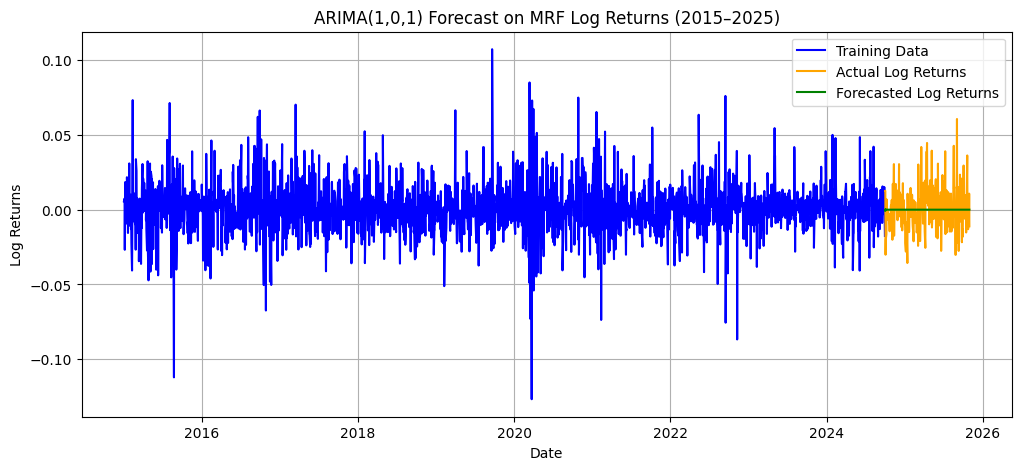

In [22]:
# -----------------------------------------
# STEP 2: ARIMA MODELING AND FORECASTING (CLEAN & CORRECTED)
# -----------------------------------------

import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# --------------------------
# 1️⃣ Data Download and Preparation
# --------------------------

start = "2015-01-01"
end = "2025-10-31"

# Download data for MRF
raw = yf.download("MRF.NS", start=start, end=end, progress=False, auto_adjust=False)

# Handle multi-index (sometimes occurs with newer yfinance)
if isinstance(raw.columns, pd.MultiIndex):
    raw.columns = raw.columns.droplevel('Ticker')

# Use Adjusted Close
price = raw['Adj Close'].astype('float64')

# Compute log returns and clean data
returns = np.log(price / price.shift(1))
series = pd.Series(returns, name="Log_Returns").replace([np.inf, -np.inf], np.nan).dropna()

# Ensure DatetimeIndex with frequency
series.index = pd.DatetimeIndex(series.index)
series = series.asfreq('B')  # Business day frequency (fills missing days as NaN)
series = series.fillna(method='ffill')  # Forward-fill missing trading days

print(f"✅ Series ready: {len(series)} points, NaNs after clean: {series.isna().sum()}")

# --------------------------
# 2️⃣ Train–Test Split
# --------------------------
train_size = int(len(series) * 0.9)
train = series.iloc[:train_size]
test = series.iloc[train_size:]

print(f"Train set: {len(train)}  |  Test set: {len(test)}")

# --------------------------
# 3️⃣ Fit ARIMA Model (via SARIMAX)
# --------------------------
model = SARIMAX(
    train,
    order=(1, 0, 1),  # ARIMA(1,0,1)
    trend='n',
    enforce_stationarity=False,
    enforce_invertibility=False
)
res = model.fit(disp=False)

print("\nModel Summary:\n")
print(res.summary())

# --------------------------
# 4️⃣ Forecast on Test Set
# --------------------------
forecast = res.get_forecast(steps=len(test)).predicted_mean
forecast = pd.Series(forecast.values.astype('float64'), index=test.index)

# Align and clean (if any NaNs)
forecast = forecast.dropna()
test_aligned = test.loc[forecast.index].dropna()

# --------------------------
# 5️⃣ Performance Evaluation
# --------------------------
rmse = math.sqrt(mean_squared_error(test_aligned, forecast))
mae = mean_absolute_error(test_aligned, forecast)

print("\n📈 Forecast Performance Metrics:")
print(f"RMSE = {rmse:.6f}")
print(f"MAE  = {mae:.6f}")

# --------------------------
# 6️⃣ Optional: Plot Actual vs Forecast
# --------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Training Data', color='blue')
plt.plot(test.index, test, label='Actual Log Returns', color='orange')
plt.plot(forecast.index, forecast, label='Forecasted Log Returns', color='green')
plt.title('ARIMA(1,0,1) Forecast on MRF Log Returns (2015–2025)')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend()
plt.grid(True)
plt.show()


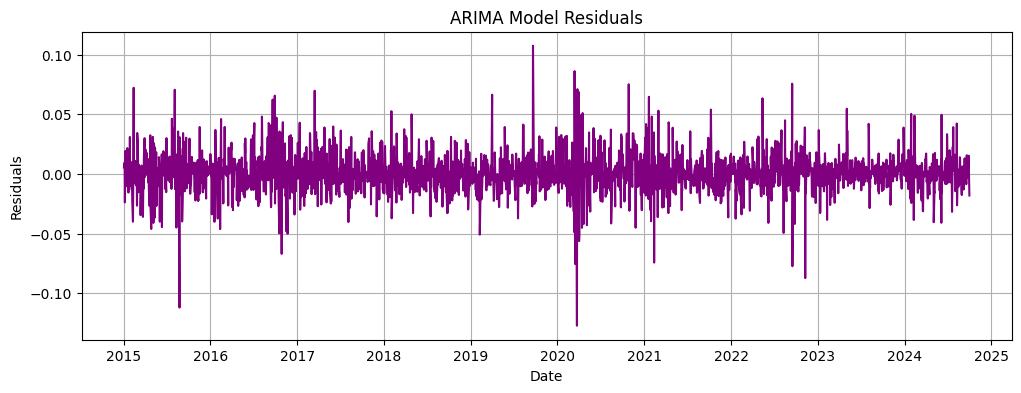

In [23]:
residuals = res.resid
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(residuals, color='purple')
plt.title('ARIMA Model Residuals')
plt.xlabel('Date'); plt.ylabel('Residuals')
plt.grid(True)
plt.show()



In [25]:
pip install arch statsmodels yfinance matplotlib pandas numpy scipy

   ---------------------------------------- 0.0/930.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/930.4 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/930.4 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 930.4/930.4 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Engle ARCH test (Lagrange multiplier):
LM stat = 151.6160, p-value = 0.0000
F stat  = 13.3326, p-value = 0.0000
If p-value < 0.05 → evidence of ARCH effects (volatility clustering).

GARCH(1,1) fit summary:
                          Zero Mean - GARCH Model Results                           
Dep. Variable:                  Log_Returns   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                6688.00
Distribution:      Standardized Student's t   AIC:                          -13368.0
Method:                  Maximum Likelihood   BIC:                          -13344.9
                                              No. Observations:                 2405
Date:                      Mon, Nov 10 2025   Df Residuals:                     2405
Time:                              15:39:14   Df Model:                            0
                            

c:\Users\rauna\codes\venv\Lib\site-packages\arch\univariate\base.py:694: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002769. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.


c:\Users\rauna\codes\venv\Lib\site-packages\arch\univariate\base.py:694: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002769. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




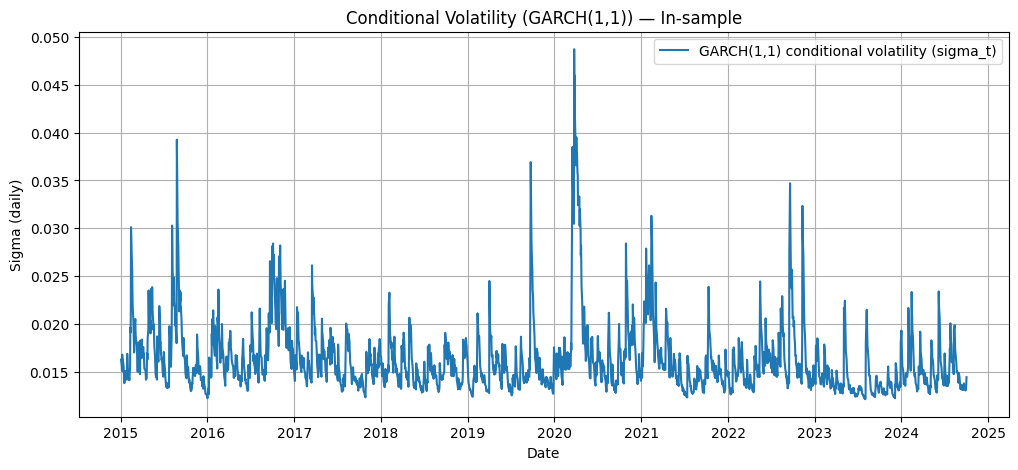

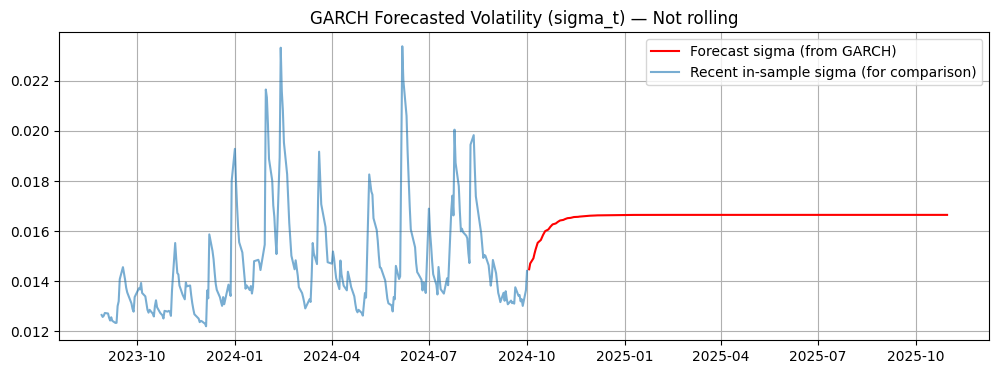

c:\Users\rauna\codes\venv\Lib\site-packages\arch\univariate\base.py:694: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002769. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.


c:\Users\rauna\codes\venv\Lib\site-packages\arch\univariate\base.py:694: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002772. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.


c:\Users\rauna\codes\venv\Lib\site-packages\arch\univariate\base.py:694: DataScaleWarning:

y is poorly 

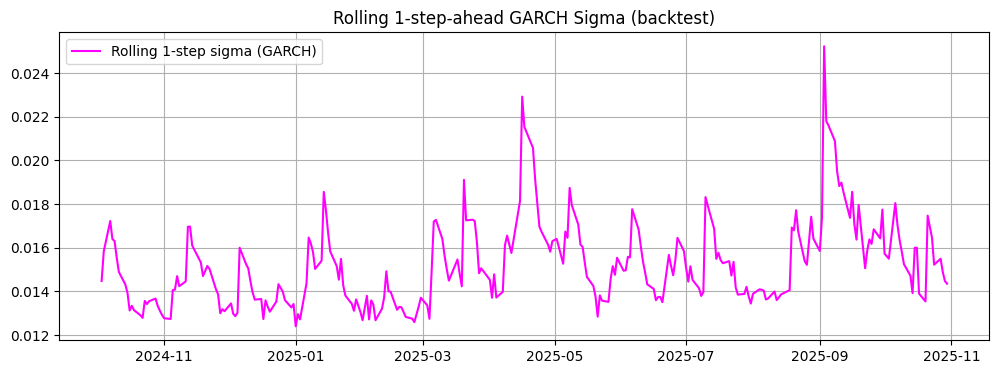


VaR 1-day 95%: exceptions = 4 out of 268 (1.49%)
Kupiec LR statistic = 9.4712  (compare to chi2(1) crit ~ 3.84 at 5%)

Sample of volatility & VaR backtest:

              Actual  Sigma_Rolling    VaR_95
2024-10-03 -0.030097       0.014478 -0.028555
2024-10-04 -0.020004       0.015840 -0.031241
2024-10-07 -0.016406       0.017225 -0.033972
2024-10-08  0.006852       0.016400 -0.032345
2024-10-09  0.003348       0.016310 -0.032168


In [31]:
# ----------------------------
# STEP 3: VOLATILITY MODELING (ARCH / GARCH)
# ----------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.stats.diagnostic import het_arch
from arch import arch_model
from scipy.stats import t
import math

# --------- 0. Data: either use existing 'series' (log returns) or download ------------------------------------------------
# Option A: if you already have `series` (pd.Series of log returns), skip to model section.
# Option B: download again (uncomment if needed)
start = "2015-01-01"
end   = "2025-10-31"
raw = yf.download("MRF.NS", start=start, end=end, progress=False, auto_adjust=False)


price = raw['Adj Close'].astype('float64')

# Compute log returns (flatten to 1-D)
returns = np.log(price / price.shift(1)).dropna()

# Ensure 1D series (use .squeeze() in case returns is DataFrame-like)
series = pd.Series(returns.squeeze(), name="Log_Returns")



# --------- 1. Engle's ARCH test (test for ARCH effects) ------------------------------------------------
arch_test = het_arch(series, nlags=12)   # common choice: 12 lags for daily
# het_arch returns (lm_stat, lm_pvalue, f_stat, f_pvalue)
print("Engle ARCH test (Lagrange multiplier):")
print(f"LM stat = {arch_test[0]:.4f}, p-value = {arch_test[1]:.4f}")
print(f"F stat  = {arch_test[2]:.4f}, p-value = {arch_test[3]:.4f}")
print("If p-value < 0.05 → evidence of ARCH effects (volatility clustering).")

# --------- 2. Fit GARCH(1,1) on training data ------------------------------------------------
# Train/test split for volatility forecasting (use same split as ARIMA if desired)
train_size = int(len(series) * 0.9)

train = series.iloc[:train_size]
test  = series.iloc[train_size:]

# Fit GARCH(1,1) with t-distributed errors (more robust for fat tails)
garch11 = arch_model(train, vol='Garch', p=1, q=1, mean='Zero', dist='t') 
res_garch11 = garch11.fit(update_freq=50, disp='off')
print("\nGARCH(1,1) fit summary:")
print(res_garch11.summary())

# --------- 3. (Optional) Fit EGARCH for leverage effects ------------------------------------------------
egarch = arch_model(train, vol='EGARCH', p=1, o=1, q=1, mean='Zero', dist='t')  # o=1 to include asymmetry
res_egarch = egarch.fit(update_freq=50, disp='off')
print("\nEGARCH(1,1,1) fit summary:")
print(res_egarch.summary())

# --------- 4. Plot conditional volatility (in-sample) ------------------------------------------------
cond_vol = res_garch11.conditional_volatility
plt.figure(figsize=(12,5))
plt.plot(cond_vol, label='GARCH(1,1) conditional volatility (sigma_t)')
plt.title('Conditional Volatility (GARCH(1,1)) — In-sample')
plt.ylabel('Sigma (daily)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# --------- 5. Out-of-sample volatility forecasts ----------------------------------------------------------------
# Forecast h-steps ahead for the test period (one-step rolling forecast recommended for strict backtest)
# Here we do a straightforward multi-step forecast from the end of train for the length of test.
h = len(test)
garch_forecast = res_garch11.forecast(horizon=h, reindex=False, method='analytic')
# predicted_variance is (nobs x horizon) in newer arch versions; we want 1-step ahead series for each test day if rolling.
# For simplicity: take the h-step ahead variance at start-of-forecast (not rolling). For a proper rolling forecast, loop day-by-day.
var_forecast = garch_forecast.variance.values[-1, :]  # last row contains forecasts from model end
sigma_forecast = np.sqrt(var_forecast)
# Create index aligned to test
sigma_forecast_series = pd.Series(sigma_forecast, index=test.index)
plt.figure(figsize=(12,4))
plt.plot(test.index, sigma_forecast_series, label='Forecast sigma (from GARCH)', color='red')
plt.plot(cond_vol[-len(sigma_forecast_series):], label='Recent in-sample sigma (for comparison)', alpha=0.6)
plt.title('GARCH Forecasted Volatility (sigma_t) — Not rolling')
plt.legend(); plt.grid(True); plt.show()

# --------- 6. Rolling 1-step-ahead volatility forecast (recommended) --------------------------------------------
# This gives a realistic backtest: re-fit or update model with expanding window and predict next day.
# --------- 6. Rolling 1-step-ahead volatility forecast (fixed for pandas >= 2.0) --------------------------------------------
rolling_sigma = []
rolling_index = []
window = train.copy()

for t_idx in test.index:
    # fit on current window
    am = arch_model(window, vol='Garch', p=1, q=1, mean='Zero', dist='t')
    r = am.fit(disp='off', show_warning=False)
    f = r.forecast(horizon=1, reindex=False, method='analytic')
    sigma1 = np.sqrt(f.variance.values[-1, 0])  # 1-step ahead variance forecast
    rolling_sigma.append(sigma1)
    rolling_index.append(t_idx)

    # ✅ append actual return to window using concat (append removed in pandas 2.0)
    window = pd.concat([window, pd.Series({t_idx: series.loc[t_idx]})])

rolling_sigma_series = pd.Series(rolling_sigma, index=rolling_index)
plt.figure(figsize=(12,4))
plt.plot(rolling_sigma_series, label='Rolling 1-step sigma (GARCH)', color='magenta')
plt.title('Rolling 1-step-ahead GARCH Sigma (backtest)')
plt.legend(); plt.grid(True); plt.show()

# --------- 7. Value at Risk (VaR) calculation (1-day, 95% level) ----------------------------------------------
# Use the rolling 1-step sigma, assume t-distribution with df estimated from each fit; here we approximate with global df.
df_t = res_garch11.params.get('nu', None) or res_garch11.distribution.nu  # some arch versions
if df_t is None:
    df_t = 8.0  # fallback
alpha = 0.05
# t-quantile for alpha (left tail)
t_q = t.ppf(alpha, df_t)
# VaR_t = mu_t + sigma_t * t_q   (mean mu_t = 0 because mean='Zero')
VaR_series = rolling_sigma_series * t_q  # negative numbers (loss threshold)
# Count exceptions
exceptions = (series.loc[VaR_series.index] < VaR_series).sum()
total = len(VaR_series)
print(f"\nVaR 1-day 95%: exceptions = {exceptions} out of {total} ({exceptions/total:.2%})")

# --------- 8. Simple Kupiec-like proportion test (unconditional coverage) -------------------------------------
# Null: exception rate = alpha
p_hat = exceptions / total
# Kupiec LR statistic: -2 * ln( (1-alpha)^(T - x) * alpha^x / (1-p_hat)^(T-x) * p_hat^x )
from math import log
x = exceptions
T = total
if 0 < p_hat < 1:
    LR = -2 * ( (T - x) * log((1 - alpha) / (1 - p_hat)) + x * log(alpha / p_hat) )
else:
    LR = float('inf')
print(f"Kupiec LR statistic = {LR:.4f}  (compare to chi2(1) crit ~ 3.84 at 5%)")

# --------- 9. Save results for report --------------------------------------------------------------------------------
out = pd.DataFrame({
    'Actual': series.loc[rolling_sigma_series.index],
    'Sigma_Rolling': rolling_sigma_series,
    'VaR_95': VaR_series
})
# quick head
print("\nSample of volatility & VaR backtest:\n")
print(out.head())


Train len: 2405 | Test len: 268
Scale check: mean=0.0550, std=1.6643

Engle ARCH LM Test (12 lags):
LM Stat = 140.8228, p-value = 0.0000
→ Reject H₀: Evidence of ARCH effects (volatility clustering).

GARCH(1,1) Model Summary:

                          Zero Mean - GARCH Model Results                           
Dep. Variable:                  Log_Returns   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -4371.19
Distribution:      Standardized Student's t   AIC:                           8750.38
Method:                  Maximum Likelihood   BIC:                           8773.53
                                              No. Observations:                 2405
Date:                      Mon, Nov 10 2025   Df Residuals:                     2405
Time:                              15:39:19   Df Model:                            0
       

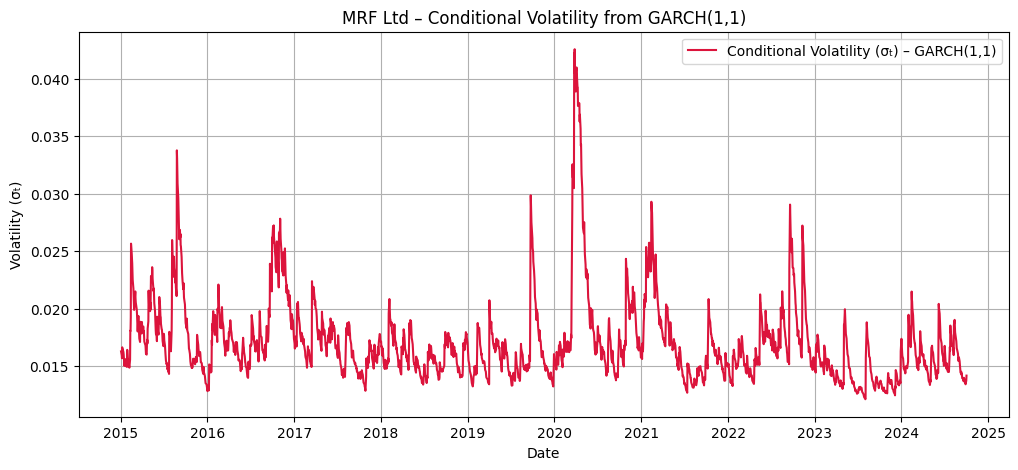

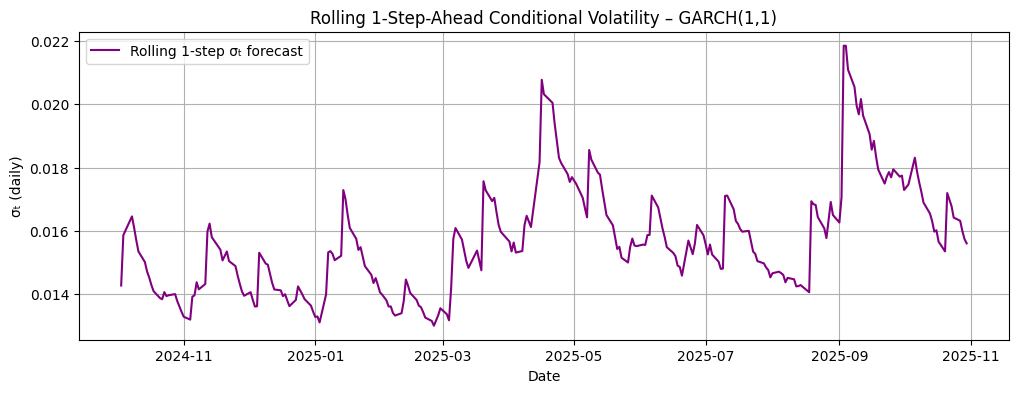


VaR(95%) exceptions: 1/268 = 0.37%
Kupiec LR = 20.2038  (compare χ²₁ critical = 3.84 at 5%)

Sample of volatility & VaR backtest:

            Actual_Return  Rolling_Sigma    VaR_95
2024-10-03      -0.030097       0.014278 -0.031643
2024-10-04      -0.020004       0.015866 -0.035164
2024-10-07      -0.016406       0.016316 -0.036161
2024-10-08       0.006852       0.016459 -0.036477
2024-10-09       0.003348       0.016100 -0.035682


In [32]:
# ---------------------------------------------------------------
# STEP 3: VOLATILITY MODELING OF MRF LTD USING ARCH / GARCH
# ---------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.stats.diagnostic import het_arch
from arch import arch_model
from scipy.stats import t
import math

# ---------------------------------------------------------------
# 1️⃣ Data download and preparation
# ---------------------------------------------------------------
start = "2015-01-01"
end   = "2025-10-31"

raw = yf.download("MRF.NS", start=start, end=end, progress=False, auto_adjust=False)
price = raw['Adj Close'].astype('float64')

# Compute log returns
returns = np.log(price / price.shift(1)).dropna()

# Convert to proper Series
series = pd.Series(returns.squeeze(), name="Log_Returns")

# Split into train / test (same 90/10 split)
train_size = int(len(series) * 0.9)
train = series.iloc[:train_size]
test  = series.iloc[train_size:]

# ---------------------------------------------------------------
# 2️⃣ Rescale data for numerical stability
# ---------------------------------------------------------------
train_scaled = train * 100
test_scaled  = test * 100
print(f"Train len: {len(train_scaled)} | Test len: {len(test_scaled)}")
print(f"Scale check: mean={train_scaled.mean():.4f}, std={train_scaled.std():.4f}")

# ---------------------------------------------------------------
# 3️⃣ Test for ARCH effects (Engle’s LM test)
# ---------------------------------------------------------------
lm_stat, lm_pvalue, f_stat, f_pvalue = het_arch(train_scaled, nlags=12)
print("\nEngle ARCH LM Test (12 lags):")
print(f"LM Stat = {lm_stat:.4f}, p-value = {lm_pvalue:.4f}")
if lm_pvalue < 0.05:
    print("→ Reject H₀: Evidence of ARCH effects (volatility clustering).")
else:
    print("→ Fail to reject H₀: No strong ARCH effects detected.")

# ---------------------------------------------------------------
# 4️⃣ Fit GARCH(1,1) model (Student-t errors)
# ---------------------------------------------------------------
garch11 = arch_model(train_scaled, vol='Garch', p=1, q=1, mean='Zero', dist='t')
res_garch11 = garch11.fit(update_freq=50, disp='off')

print("\nGARCH(1,1) Model Summary:\n")
print(res_garch11.summary())

# ---------------------------------------------------------------
# 5️⃣ (Optional) Fit EGARCH(1,1,1) model to capture asymmetry
# ---------------------------------------------------------------
egarch = arch_model(train_scaled, vol='EGARCH', p=1, o=1, q=1, mean='Zero', dist='t')
res_egarch = egarch.fit(update_freq=50, disp='off')

print("\nEGARCH(1,1,1) Model Summary:\n")
print(res_egarch.summary())

# ---------------------------------------------------------------
# 6️⃣ Plot in-sample conditional volatility (GARCH)
# ---------------------------------------------------------------
cond_vol_scaled = res_garch11.conditional_volatility / 100  # back to original units
plt.figure(figsize=(12, 5))
plt.plot(cond_vol_scaled, label='Conditional Volatility (σₜ) – GARCH(1,1)', color='crimson')
plt.title('MRF Ltd – Conditional Volatility from GARCH(1,1)')
plt.ylabel('Volatility (σₜ)')
plt.xlabel('Date')
plt.legend(); plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# 7️⃣ Rolling 1-step-ahead volatility forecasts
# ---------------------------------------------------------------
rolling_sigma = []
rolling_index = []
window = train_scaled.copy()

for t_idx in test_scaled.index:
    am = arch_model(window, vol='Garch', p=1, q=1, mean='Zero', dist='t')
    r = am.fit(disp='off', show_warning=False)
    f = r.forecast(horizon=1, reindex=False, method='analytic')
    sigma1 = np.sqrt(f.variance.values[-1, 0])
    rolling_sigma.append(sigma1 / 100)  # back to original scale
    rolling_index.append(t_idx)
    # pandas ≥ 2.0: use concat instead of append
    window = pd.concat([window, pd.Series({t_idx: test_scaled.loc[t_idx]})])

rolling_sigma_series = pd.Series(rolling_sigma, index=rolling_index)

plt.figure(figsize=(12,4))
plt.plot(rolling_sigma_series, color='purple', label='Rolling 1-step σₜ forecast')
plt.title('Rolling 1-Step-Ahead Conditional Volatility – GARCH(1,1)')
plt.ylabel('σₜ (daily)')
plt.xlabel('Date')
plt.legend(); plt.grid(True)
plt.show()

# ---------------------------------------------------------------
# 8️⃣ Compute 1-day 95% Value-at-Risk (VaR) and backtest
# ---------------------------------------------------------------
df_t = res_garch11.params.get('nu', None) or res_garch11.distribution.nu
alpha = 0.05
t_q = t.ppf(alpha, df_t)

VaR_series = rolling_sigma_series * t_q  # negative threshold
actual_returns = series.loc[rolling_sigma_series.index]

exceptions = (actual_returns < VaR_series).sum()
total = len(VaR_series)
p_hat = exceptions / total

print(f"\nVaR(95%) exceptions: {exceptions}/{total} = {p_hat:.2%}")

# Kupiec unconditional coverage statistic
from math import log
if 0 < p_hat < 1:
    LR = -2 * ((total - exceptions) * log((1 - alpha) / (1 - p_hat)) +
               exceptions * log(alpha / p_hat))
else:
    LR = float('inf')
print(f"Kupiec LR = {LR:.4f}  (compare χ²₁ critical = 3.84 at 5%)")

# ---------------------------------------------------------------
# 9️⃣ Summary output sample
# ---------------------------------------------------------------
out = pd.DataFrame({
    'Actual_Return': actual_returns,
    'Rolling_Sigma': rolling_sigma_series,
    'VaR_95': VaR_series
})
print("\nSample of volatility & VaR backtest:\n")
print(out.head())


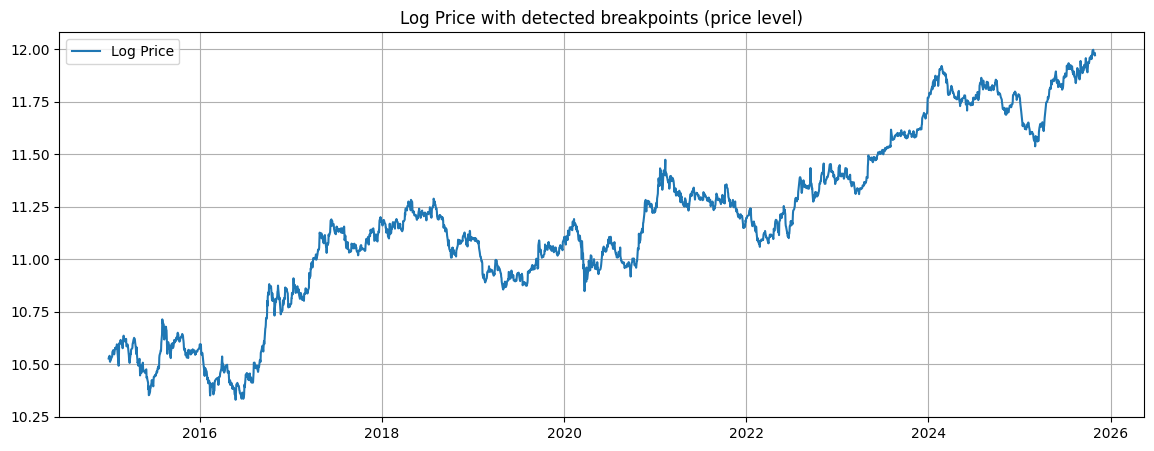

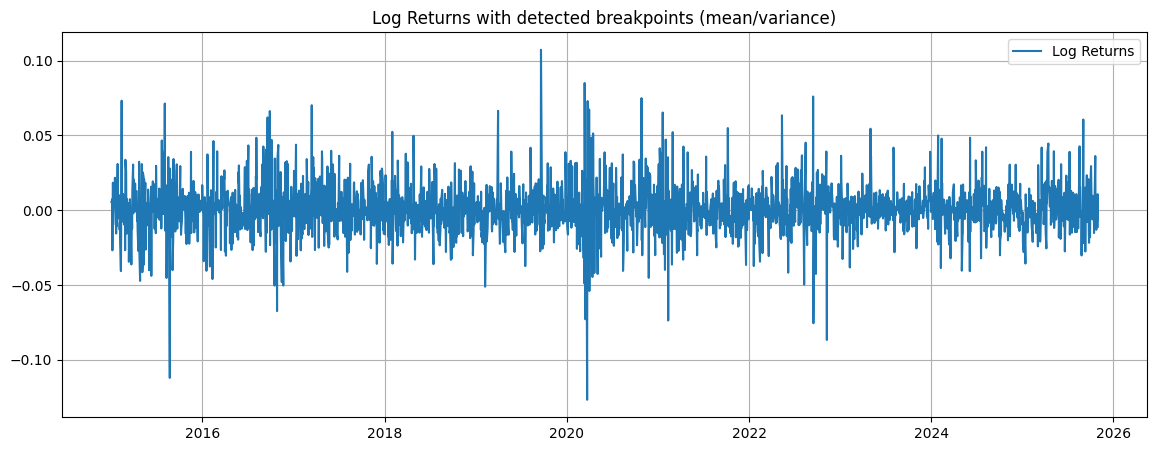

Detected break dates in log price (mean/trend shifts):

Detected break dates in returns (mean/variance shifts):

Running Chow tests on candidate dates:
 - 2020-03-23: F = 233.347, p-value = 0.0000 (n1=1286, n2=1388)

Breaks DataFrame sample (may contain NaNs if counts differ):
Empty DataFrame
Columns: [price_breaks, returns_breaks]
Index: []

Structural break summary:
No significant breaks detected.


In [ ]:
# ------------------------------
# STEP 4: STRUCTURAL BREAKS (ruptures + Chow test)
# ------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import datetime

# Ensure 1-D series
log_price = np.log(price.squeeze()).dropna()
returns = series.squeeze().dropna()

def chow_test(series, break_date):
    s = series.dropna()
    if isinstance(break_date, str):
        bd = pd.to_datetime(break_date)
    else:
        bd = break_date
    if bd not in s.index:
        bd = s.index[s.index.get_indexer([bd], method='nearest')[0]]
    
    # ✅ Flatten values to 1-D before building DataFrame
    df = pd.DataFrame({'y': np.ravel(s.values)}, index=s.index)
    df['t'] = np.arange(len(df))
    
    df1 = df.loc[:bd]
    df2 = df.loc[bd+pd.Timedelta(days=1):]
    
    if len(df1) < 5 or len(df2) < 5:
        return None
    
    model_pooled = ols("y ~ t", data=df).fit()
    model1 = ols("y ~ t", data=df1).fit()
    model2 = ols("y ~ t", data=df2).fit()
    
    RSS_pooled = sum(model_pooled.resid**2)
    RSS1 = sum(model1.resid**2)
    RSS2 = sum(model2.resid**2)
    k = model_pooled.df_model + 1
    n1 = int(model1.nobs)
    n2 = int(model2.nobs)
    
    numer = (RSS_pooled - (RSS1 + RSS2)) / k
    denom = (RSS1 + RSS2) / (n1 + n2 - 2*k)
    F = numer / denom
    
    from scipy.stats import f
    pval = 1 - f.cdf(F, k, (n1 + n2 - 2*k))
    
    return {'F': F, 'pval': pval, 'RSS_pooled': RSS_pooled,
            'RSS1': RSS1, 'RSS2': RSS2, 'n1': n1, 'n2': n2, 'k': int(k)}




# ------------------------------
# Helper: Chow test for a single break date
# ------------------------------

# ------------------------------
# Inputs: use series from previous steps (log prices and returns)
# Assume you have:
#   price -> pd.Series of Adjusted Close (indexed by datetime)
#   series -> pd.Series of log returns (indexed)
# If not, load them similar to earlier steps:
# ------------------------------
# Example: (uncomment if needed)
# import yfinance as yf
# raw = yf.download("MRF.NS", "2015-01-01", "2025-10-31", progress=False, auto_adjust=False)
# price = raw['Adj Close'].astype(float)
# series = np.log(price / price.shift(1)).dropna()

# For structural breaks we will use:
# 1) log price level: log_price = np.log(price)
# 2) return series: series (log returns)

# Make sure price and series exist in the environment
try:
    price
    series
except NameError:
    raise RuntimeError("Please define 'price' (Adj Close series) and 'series' (log returns series) before running.")

log_price = np.log(price).dropna()
returns = series.dropna()

# ------------------------------
# Detect breakpoints (Bai-Perron style) using ruptures
# We'll detect breaks in:
#   A) log_price (trend/mean breaks)
#   B) returns using change in variance+mean (rbf)
# Choose number of breaks or allow algorithm to select via penalty
# ------------------------------
# A) Breaks in log price (use linear model/bkps on 'l2' cost after detrending)
signal_price = log_price.values
# We detrend price by regressing on time and analyzing residuals for mean shifts (optional)
t = np.arange(len(signal_price))
X = sm.add_constant(t)
res = sm.OLS(signal_price, X).fit()
resid_price = res.resid

# Use ruptures Pelt with "l2" cost on residuals to find breakpoints (mean shifts)
algo = rpt.Pelt(model="l2").fit(resid_price)
# set penalty (larger penalty -> fewer breaks). You can try different values; here we choose ic penalty via BIC-like:
pen = 3 * np.log(len(resid_price))  # heuristic, adjust if too many/few breaks
bkps_price = algo.predict(pen=pen)
# bkps gives break indices (last index is len)
bkps_price = [i for i in bkps_price if i < len(resid_price)]
break_dates_price = [log_price.index[i] for i in bkps_price]

# B) Breaks in returns (use "rbf" cost to capture mean+variance changes)
signal_ret = returns.values
algo2 = rpt.Pelt(model="rbf").fit(signal_ret)
pen2 = 3 * np.log(len(signal_ret))
bkps_ret = algo2.predict(pen=pen2)
bkps_ret = [i for i in bkps_ret if i < len(signal_ret)]
break_dates_returns = [returns.index[i] for i in bkps_ret]

# ------------------------------
# Plot price with detected breaks
# ------------------------------
plt.figure(figsize=(14,5))
plt.plot(log_price.index, log_price.values, label='Log Price')
for bd in break_dates_price:
    plt.axvline(bd, color='red', linestyle='--', alpha=0.8)
plt.title('Log Price with detected breakpoints (price level)')
plt.legend(); plt.grid(True); plt.show()

# Plot returns with detected breaks
plt.figure(figsize=(14,5))
plt.plot(returns.index, returns.values, label='Log Returns')
for bd in break_dates_returns:
    plt.axvline(bd, color='purple', linestyle='--', alpha=0.8)
plt.title('Log Returns with detected breakpoints (mean/variance)')
plt.legend(); plt.grid(True); plt.show()

# ------------------------------
# Print detected break dates (user friendly)
# ------------------------------
print("Detected break dates in log price (mean/trend shifts):")
for d in break_dates_price:
    print(" -", pd.to_datetime(d).date())

print("\nDetected break dates in returns (mean/variance shifts):")
for d in break_dates_returns:
    print(" -", pd.to_datetime(d).date())

# ------------------------------
# Apply Chow test on candidate dates (user can adjust)
# Candidate dates: common financial events e.g., COVID low (Mar 2020), market rallies, etc.
# Provide a default candidate list including:
#   - 2020-03-23 (global COVID low)
#   - first break detected (if any)
#   - last break detected (if any)
# ------------------------------
candidates = []
candidates.append(pd.to_datetime("2020-03-23"))
if break_dates_price:
    candidates.append(break_dates_price[0])
if break_dates_returns:
    candidates.append(break_dates_returns[0])

print("\nRunning Chow tests on candidate dates:")
for cand in candidates:
    result = chow_test(log_price, cand)
    if result is None:
        print(f" - Candidate {cand.date()} skipped (insufficient data around break).")
        continue
    print(f" - {pd.to_datetime(cand).date()}: F = {result['F']:.3f}, p-value = {result['pval']:.4f} "
          f"(n1={result['n1']}, n2={result['n2']})")

# ------------------------------
# Save break info to DataFrame for report
# ------------------------------
breaks_df = pd.DataFrame({
    'price_breaks': [pd.to_datetime(d).date() for d in break_dates_price],
    'returns_breaks': [pd.to_datetime(d).date() for d in break_dates_returns]
})
print("\nBreaks DataFrame sample (may contain NaNs if counts differ):")
print(breaks_df.head())

# ------------------------------
# Report text sample for each detected break
# ------------------------------
def summarize_breaks(price_bkps, ret_bkps):
    lines = []
    lines.append("Structural break summary:")
    if not price_bkps and not ret_bkps:
        lines.append("No significant breaks detected.")
        return "\n".join(lines)
    if price_bkps:
        lines.append("Price-level breaks detected at:")
        for d in price_bkps:
            lines.append(f"  - {pd.to_datetime(d).date()}")
    if ret_bkps:
        lines.append("Return-level breaks (mean/variance) detected at:")
        for d in ret_bkps:
            lines.append(f"  - {pd.to_datetime(d).date()}")
    return "\n".join(lines)

print("\n" + summarize_breaks(break_dates_price, break_dates_returns))


Using price column: close_mrf.ns
            close_mrf.ns   high_mrf.ns    low_mrf.ns   open_mrf.ns  \
Date                                                                 
2015-01-02  37551.148438  37755.411111  37343.444516  37509.607653   
2015-01-05  37831.402344  38728.780555  37362.113762  37656.094605   
2015-01-06  36831.191406  37706.251747  36723.037881  37706.251747   
2015-01-07  36753.574219  37091.699993  36389.735093  36869.543547   
2015-01-08  37437.339844  37558.766747  37079.499953  37155.649093   

            volume_mrf.ns  log_returns  
Date                                    
2015-01-02          11099     0.005537  
2015-01-05          38178     0.007436  
2015-01-06          15734    -0.026794  
2015-01-07          10795    -0.002110  
2015-01-08          13462     0.018433  

Columns available: ['close_mrf.ns', 'high_mrf.ns', 'low_mrf.ns', 'open_mrf.ns', 'volume_mrf.ns', 'log_returns']


C:\Users\rauna\AppData\Local\Temp\ipykernel_65648\3701565451.py:8: FutureWarning:

YF.download() has changed argument auto_adjust default to True



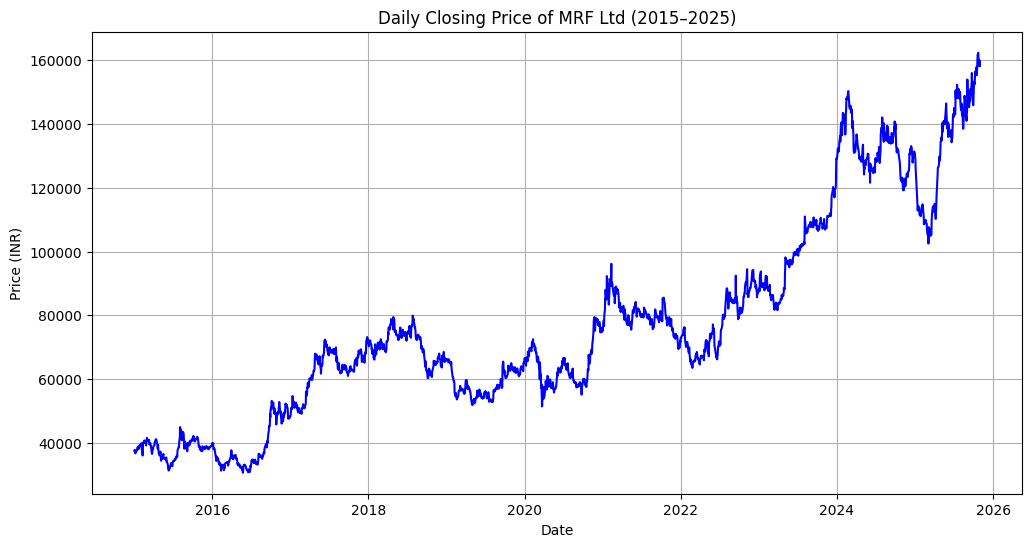

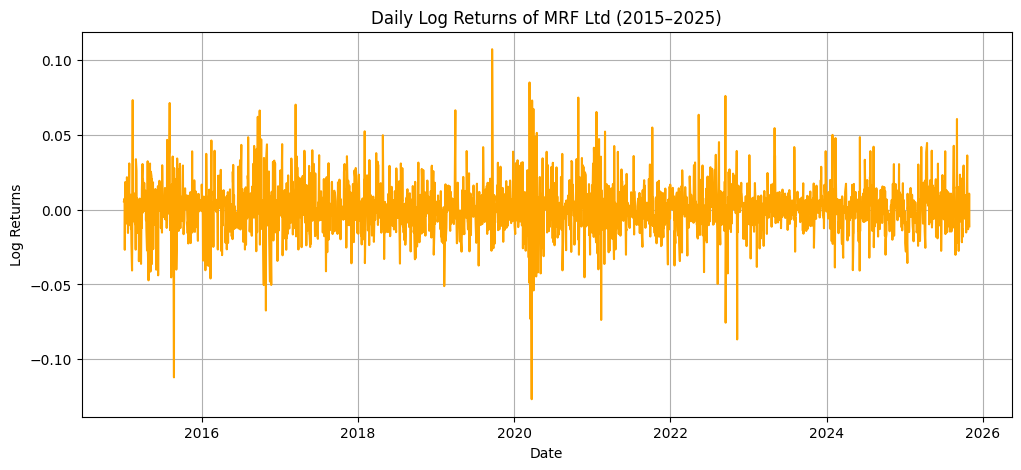

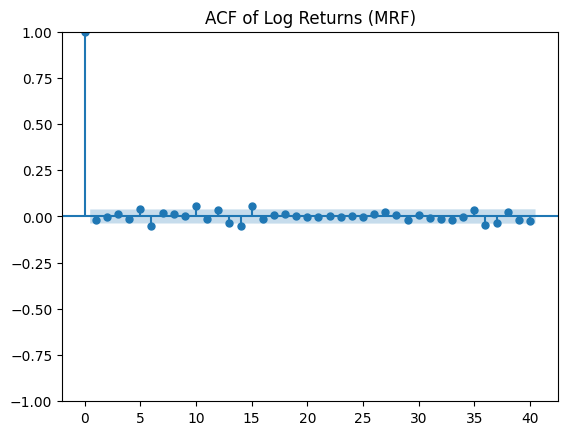

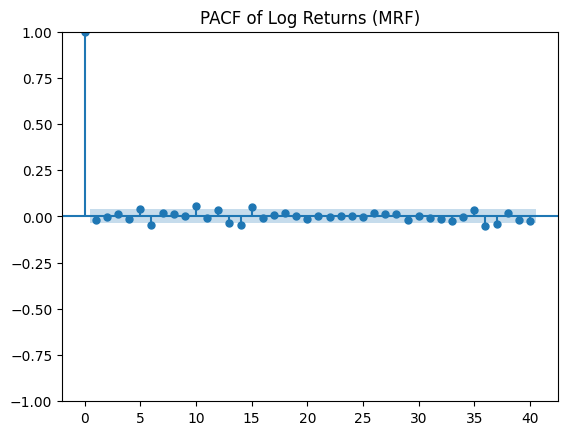

In [39]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1️⃣ Download data
data = yf.download("MRF.NS", start="2015-01-01", end="2025-10-31", progress=False)

# 2️⃣ Flatten columns if they are multi-level (e.g., ('MRF.NS','Close'))
if isinstance(data.columns, pd.MultiIndex):
    data.columns = ['_'.join(col).strip().lower() for col in data.columns.values]
else:
    data.columns = [col.strip().lower().replace(' ', '_') for col in data.columns]

# 3️⃣ Try to identify the right price column automatically
possible_price_cols = [c for c in data.columns if "adj" in c and "close" in c]
if len(possible_price_cols) == 0:
    possible_price_cols = [c for c in data.columns if "close" in c]

if len(possible_price_cols) == 0:
    raise KeyError("No column found containing 'close' or 'adj close' in name.")

price_col = possible_price_cols[0]
print(f"Using price column: {price_col}")

# 4️⃣ Compute log returns safely
data["log_returns"] = np.log(data[price_col] / data[price_col].shift(1))
data.dropna(inplace=True)

# 5️⃣ Quick check
print(data.head())
print("\nColumns available:", data.columns.tolist())

# 6️⃣ Plot Price
plt.figure(figsize=(12,6))
plt.plot(data[price_col], color='blue')
plt.title("Daily Closing Price of MRF Ltd (2015–2025)")
plt.xlabel("Date"); plt.ylabel("Price (INR)")
plt.grid(True); plt.show()

# 7️⃣ Plot Log Returns
plt.figure(figsize=(12,5))
plt.plot(data["log_returns"], color='orange')
plt.title("Daily Log Returns of MRF Ltd (2015–2025)")
plt.xlabel("Date"); plt.ylabel("Log Returns")
plt.grid(True); plt.show()

# 8️⃣ ACF and PACF for Returns
plot_acf(data["log_returns"], lags=40, title='ACF of Log Returns (MRF)')
plt.show()

plot_pacf(data["log_returns"], lags=40, title='PACF of Log Returns (MRF)')
plt.show()


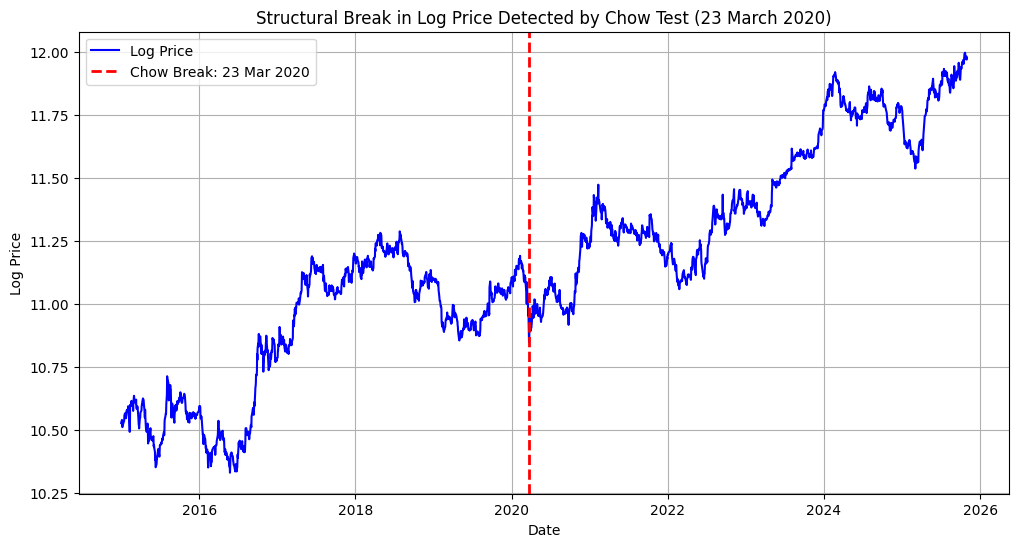

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'price' is your Adjusted Close series from earlier steps
# and its index is datetime type
log_price = np.log(price).dropna()

# Define the break date from your Chow test result
break_date = pd.to_datetime("2020-03-23")

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(log_price.index, log_price.values, color='blue', label='Log Price')
plt.axvline(x=break_date, color='red', linestyle='--', linewidth=2, label='Chow Break: 23 Mar 2020')

# Title and labels
plt.title('Structural Break in Log Price Detected by Chow Test (23 March 2020)')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()
plt.grid(True)

# Save the figure (important for LaTeX inclusion)
plt.savefig("chow_break_plot.png", dpi=300, bbox_inches='tight')
plt.show()
